In [7]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
api = wandb.Api()

1. Replace prediction with measured data

In [8]:
sweep1 = api.sweep('FlowReconstruction/0582grfn')
s1_runs = sweep1.runs

In [14]:
l1 = []
lp1 = []
ls1 = []
c1 = []
for run in s1_runs:
    c1.append(run.config)
    hist = run.scan_history(keys=['loss_sensors','loss_momentum','loss_div'])
    l = []
    lp =[]
    ls = []
    for row in hist:
        l.append(row['loss_sensors'] + row['loss_momentum'] + row['loss_div'])
        lp.append(row['loss_div'] + row['loss_momentum'])
        ls.append(row['loss_sensors'])
    l1.append(np.array(l))
    lp1.append(np.array(lp))
    ls1.append(np.array(ls))

2. Not replacing observations

In [15]:
sweep2 = api.sweep('FlowReconstruction/6407xae4')
s2_runs = sweep2.runs

In [16]:
l2 = []
lp2 = []
ls2 = []
c2 = []
for run in s2_runs:
    c2.append(run.config)
    hist = run.scan_history(keys=['loss_sensors','loss_momentum','loss_div'])
    l = []
    lp =[]
    ls = []
    for row in hist:
        l.append(row['loss_sensors'] + row['loss_momentum'] + row['loss_div'])
        lp.append(row['loss_div'] + row['loss_momentum'])
        ls.append(row['loss_sensors'])
    l2.append(np.array(l))
    lp2.append(np.array(lp))
    ls2.append(np.array(ls))

In [21]:
l_final1 = [l[-1] for l in l1]
l_final2 = [l[-1] for l in l2]

lp_final1 = [l[-1] for l in lp1]
lp_final2 = [l[-1] for l in lp2]

ls_final1 = [l[-1] for l in ls1]
ls_final2 = [l[-1] for l in ls2]

In [43]:
ls_final1

[0.0001556451024953276,
 0.0001349138474324718,
 0.0008233492844738066,
 3.27370289596729e-05,
 0.0004965962143614888,
 1.9811808670056053e-05,
 0.0255369134247303,
 9.164837683783844e-05,
 1.8242109945276752e-05,
 0.00011757612082874402,
 0.0003092082042712718,
 5.5813663493609056e-05]

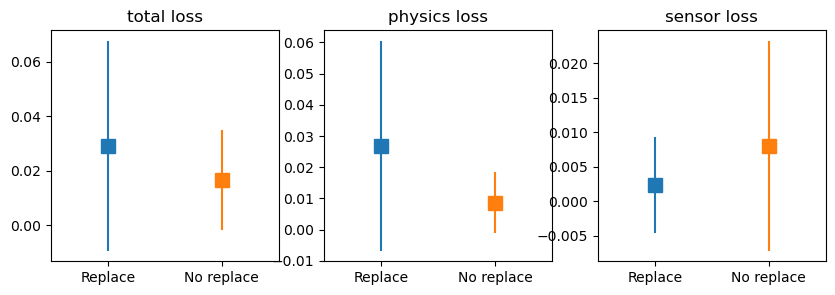

In [41]:
fig, axes = plt.subplots(1,3,figsize=(10,3),sharex=True)

axes[0].set(xticks=[1,2],xticklabels=['Replace','No replace'],xlim=[0.5,2.5],title='total loss')
axes[0].errorbar(1,np.mean(l_final1),np.std(l_final1),marker='s',markersize=10)
axes[0].errorbar(2,np.mean(l_final2),np.std(l_final2),marker='s',markersize=10)

axes[1].set_title('physics loss')
axes[1].errorbar(1,np.mean(lp_final1),np.std(lp_final1),marker='s',markersize=10)
axes[1].errorbar(2,np.mean(lp_final2),np.std(lp_final2),marker='s',markersize=10)

axes[2].set_title('sensor loss')
axes[2].errorbar(1,np.mean(ls_final1),np.std(ls_final1),marker='s',markersize=10)
axes[2].errorbar(2,np.mean(ls_final2),np.std(ls_final2),marker='s',markersize=10)

plt.show()

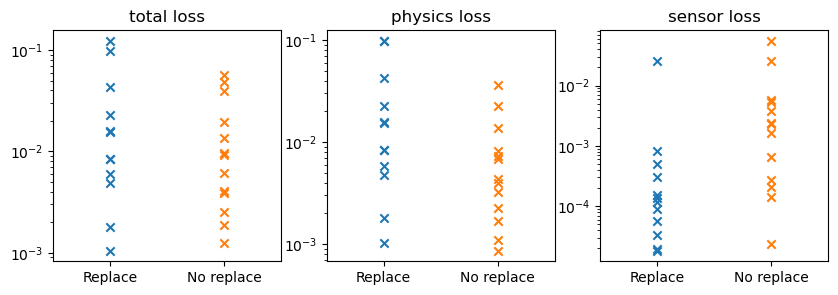

In [54]:
fig, axes = plt.subplots(1,3,figsize=(10,3),sharex=True)

axes[0].set(xticks=[1,2],xticklabels=['Replace','No replace'],xlim=[0.5,2.5],title='total loss',yscale='log')
axes[0].scatter(np.ones_like(l_final1),l_final1,marker='x')
axes[0].scatter(np.ones_like(l_final2)*2,l_final2,marker='x')

axes[1].set(title='physics loss', yscale='log')
axes[1].scatter(np.ones_like(lp_final1),lp_final1,marker='x')
axes[1].scatter(np.ones_like(lp_final2)*2,lp_final2,marker='x')

axes[2].set(title='sensor loss', yscale='log')
axes[2].scatter(np.ones_like(ls_final1),ls_final1,marker='x')
axes[2].scatter(np.ones_like(ls_final2)*2,ls_final2,marker='x')

plt.show()

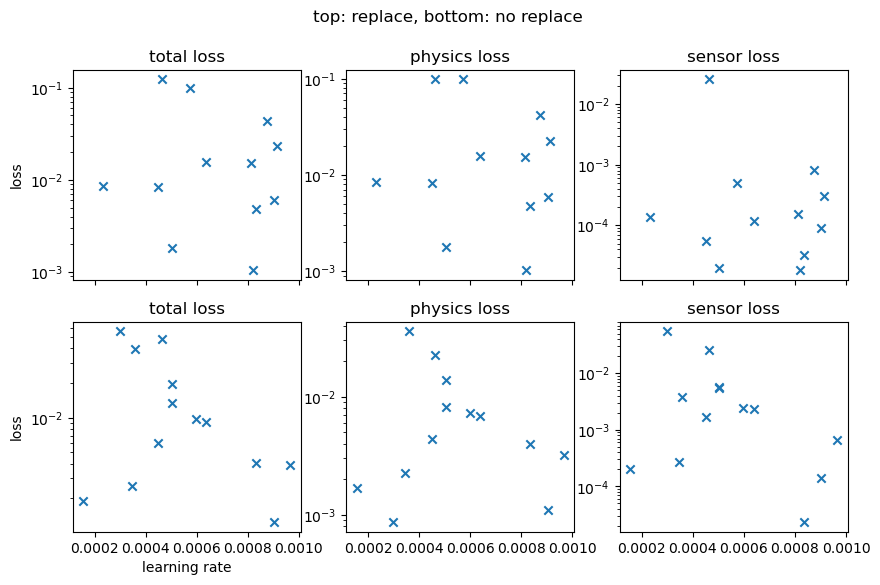

In [67]:
lr1 = [r['learning_rate'] for r in c1]
lr2 = [r['learning_rate'] for r in c2]
fig, axes = plt.subplots(2,3,figsize=(10,6),sharex=True)
fig.suptitle('top: replace, bottom: no replace')

axes[0,0].scatter(lr1,l_final1,marker='x',label='total')
axes[0,0].set(title='total loss',ylabel='loss',yscale='log')
axes[0,1].scatter(lr1,lp_final1,marker='x',label='physics')
axes[0,1].set(title='physics loss',yscale='log')
axes[0,2].scatter(lr1,ls_final1,marker='x',label='sensors')
axes[0,2].set(title='sensor loss',yscale='log')


axes[1,0].scatter(lr2,l_final2,marker='x',label='total')
axes[1,0].set(title='total loss',ylabel='loss',xlabel='learning rate',yscale='log')
axes[1,1].scatter(lr2,lp_final2,marker='x',label='physics')
axes[1,1].set(title='physics loss',yscale='log')
axes[1,2].scatter(lr2,ls_final2,marker='x',label='sensors')
axes[1,2].set(title='sensor loss',yscale='log')
plt.show()

In [79]:
corr1 = []
corr2 = []

for i in range(len(lp1)):
    corr1.append(np.corrcoef(lp1[i][50000:],ls1[i][50000:])[1,1])
for i in range(len(lp2)):
    corr2.append(np.corrcoef(lp2[i][50000:],ls2[i][50000:])[1,1])